# Homework Assignment 2

Please save your work in your personal **mp248** repository.  The pre-grading script has been running since 9pm on October 10th. It is putting the feedback in **Task 5** in your grades on CourseSpaces.  

The assignment is due at 11:59pm on Friday October 25th. When you push your assignment to your repository, please save it in **mp248/Assignments/hwk.2.ipynb**.

----

**P1)** Develop a function similar to **cbasinPlot** from Lecture 5a, but this plot will only show the points where Newton's method eventually fails. 

Recall, Newton's method for solving for the roots $f(z) = 0$ is given by iterating the **Newton Iterator** $N(z)$ from an initial guess $z_0$.

$$ N(z) =  z - \frac{f(z)}{f'(z)}$$

We say Newton's method fails **immediately** with initial condition $z_0$ if the above expression does not make sense, i.e. $f'(z_0)=0$. 

We say Newton's method fails in **one step** at $z_0$ if, after applying the Newton iterator once, Newton's method fails, i.e. $f'(N(z_0)) = 0$.  

We say Newton's method fails **after $n$ steps** if after applying the Newton iterator $n$ times, you get a number where the Newton Iterator is undefined.   To give this some notation, define $N^{(2)}(z) = N(N(z))$, $N^{(3)}(z) = N(N(N(z)))$, etc, $N^{(n)}(z) = N(N(\cdots N(z) \cdots ))$. Thus the $n$-step failure set $F(n)$ is defined as 

$$F(n) = \{ z_0 : f'(N^{(n)}(z_0))=0 \}$$

Thus, $N^{-1}(F(n)) = F(n+1)$, i.e. we have a recursively-defined set $F(n)$.

(a) Plot the sets $F(0), F(1), F(2), F(3), \cdots$ in the region $-1.3 \leq z.real \leq 1.3$, $-1.3 \leq z.imag \leq 1.3$ for $f(z)=z^3-1$.

(b) Do the same for $f(z) = z^5-z-1$.

**Hint:** For this problem you will need to iteratively solve for the roots of various polynomial equations. I suggest using **np.roots** or **mpmath.polyroots**, like in Lecture 3c. A sympy polynomial $p(z)$ can be converted to a numpy/mpmath polynomial via `p.as_poly(z).all_coeffs()`. See the example below.

**Pre-grading script:** Somewhere in your code, please print out the entries of $F(0)$, $F(1)$ and $F(2)$, as a set of complex floats. When printing these complex float (say for example **z**) please print as **np.around(z,5)**, i.e. have five significant digits in your output. eg: **str(np.around(np.pi,5))=="3.14159"**.  Do this both for (a) $f(z)=z^3-1$ and part (b) with $f(z)=z^5-z-1$.  The pre-grading script will search for these answers and give you feedback in **Task 5**. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


----

**P2)** Write a Python function $f(n)$ that returns a Sympy polynomial that is the degree $2n$ Taylor expansion of the $\cos x$ function.

$$T^{2n}(x) = 1 - \frac{x^2}{2!}x^2 + \frac{x^4}{4!}x^4 + \cdots + (-1)^n\frac{x^{2n}}{(2n)!}x^{2n}$$

Print out these polynomials for $n=1,2,3,4,5$ using sympy's **pprint** command.

Use Sympy to compute the integrals:
$$\int_0^x \cos(x^2) dx$$ 
$$\int_0^x T^{2n}(x^2) dx \text{  for  } n=1,2,3,4,5.$$

Put the plots of these functions in one common matplotlib plot, so that they can be compared.  Make the domain of the plot $[-3.4,3.4]$.  How big do you need to make $n$ to ensure these two plots look the same on this domain?


----

**P3)** Create a function **historic_plot(city, feat)** that takes as input a city name (eg: **w.sask** and **w.vic** for Saskatoon and Victoria respectively), and a weather feature key (eg: **Mean Temp (°C)** or **Total Rain (mm)**).  The function will create a matplotlib plot (a point plot) where the x-axis represents the date of the measurement (i.e. the scale will be in days), and the y-axis represents the measurement corresponding to the key. Include the linear least-squares approximations in your plot.  Label the linear least square fit i.e. $y=ax+b$ with $a,b$ the appropriate coefficients, and put in the legend. Include in your title the yearly increase in the readings, i.e. this should be $365 \cdot a$.  Use the library from lecture 6c.

Include the output of **historic_plot** for all four cities, with the weather feature **"Mean Temp (°C)"** in your notebooks, using matplotlib in **inline** mode.  After each plot, print to screen the coefficients of your least-square fit, i.e. use a **print(c)** command, if you use the same notation as in Lecture 6c.   

How do your trend lines compare with the global warming predictions we see in newspaper articles?

**Pre-grading script:** The script will check for your least-square coefficients for the four plots, i.e. the **print(c)** output. c should be a shape (2,1) numpy array, i.e. a 2-dimensional column vector.

In [2]:
import pprint as pp
import datetime as dt ## library to manipulate dates and times
import matplotlib.pyplot as plt
import os
import fnmatch as fn
import scipy.optimize 
%matplotlib inline

def parse_fname(fname):
    with open(fname, encoding='utf8') as f:
        content = f.read().split('\n')
        '''this splits the string.  [typical way of doing multi-line comments.]
        ## converts the file into one big text string.
        ## and split by lines
        ## two things you can do. rather than use read() command you can use readlines()'''
        ## problem in the new f[i for i in range(len(content)) if 'legend' in content[i].lower()]
        if len(leglines)!=1
            print("Error not unique legend line.")
            return(None
        
        ID_pairs = [x.replace('"', '').replace('\ufeff', '').split(',')\
                    for x in content[:leglines[0]-1]]
        fdat = dict(ID_pairs)
        to_float=['Elevation', 'Latitude', 'Longitude']
        to_int = ['WMO Identifier']
        for k in to_float:
            if k in fdat.keys():
                fdat[k] = float(fdat[k])
        for k in to_int:
            if k in fdat.keys():
                if fdat[k]=='':
                    del fdat[k] ## removal of key from dictionary 
                else:
                    fdat[k] = int(fdat[k])
        ## next: let's load the keys for the row data.     
        keylines = [i for i in range(len(content)) if 'date/time' in\
                   content[i].lower()]
        if len(keylines)!=1:
            print('Error! Need only one key line.')
            return(None)
        ## parse the row the row data, i.e. all data from "keylines" down.
        keys = content[keylines[0]].replace('"','').split(',')
        ## now the remaining rows, we want to put into a list of dictionaries
        fdat['rows']=[]
        for L in content[keylines[0]+1:]:
            L=L.replace('"','').split(',')
            if len(L)!=len(keys):
                continue
            ignore_keys = ['Year', 'Month', 'Day']
            X = {keys[i]:L[i] for i in range(len(keys)) if L[i]!=''\
                 and (keys[i] not in ignore_keys)}
            ## make the data more useful 
            to_date = ['Date/Time']
            to_float = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',\
                       'Total Precip (mm)', 'Total Rain (mm)', 'Total Snow (cm)',\
                       'Snow on Grnd (cm)', 'Cool Deg Days (°C)', 'Heat Deg Days (°C)']
            
            for k in to_date:
                X[k] = dt.datetime.strptime(X[k], "%Y-%m-%d").date()
            for k in to_float:
                if k in X.keys():
                    X[k] = float(X[k])
            
            fdat['rows'].append(X)
        return(fdat)    


In [8]:
def historic_plot(city, feat):
    '''
    Input: 
        - city: a city name (eg: w.sask and w.vic for Saskatoon and Victoria respectively)
        - feat: a weather feature key
    Output:
        The function will create a matplotlib plot (a point plot) where:
        - x-axis represents the date of the measurement, 
        - y-axis represents the measurement corresponding to the key
        Include the linear and quadratic least-squares approximations
    '''
    route = '../../mp248-course/Data/CWD/'
    if "Calgary" in city:
        wsubdirs = fn.filter(os.listdir(route), "w.cal")
    elif "Edmonton" in city:
        wsubdirs = fn.filter(os.listdir(route), "w.edm")
    elif "Saskatoon" in city:
        wsubdirs = fn.filter(os.listdir(route), "w.sask")
    elif "Victoria" in city:
        wsubdirs = fn.filter(os.listdir(route), "w.vic")
    else:
        return(print(city, 'not found'))
    
    mdat=dict()
    for wd in wsubdirs:
        files = fn.filter(os.listdir(route+wd), "eng-daily*.csv")
        for wdf in files:
            fname = route+wd+'/'+wdf
            pf = parse_fname(fname)
            for v in pf['rows']:
                K = (wd, v['Date/Time'])
                mdat[K] = v
    
    k1 = 'Date/Time'
    k2 = feat
    
    
    if "Victoria" in city:
        MM=[(v[k1], v[k2]) for k,v in mdat.items() if k[0]=='w.vic'\
        and (k1 in v.keys()) and (k2 in v.keys())]
    elif "Calgary" in city:
        MM=[(v[k1], v[k2]) for k,v in mdat.items() if k[0]=='w.cal'\
        and (k1 in v.keys()) and (k2 in v.keys())]
    elif "Saskatoon" in city:
        MM=[(v[k1], v[k2]) for k,v in mdat.items() if k[0]=='w.sask'\
        and (k1 in v.keys()) and (k2 in v.keys())]
    elif "Edmonton" in city:
        MM=[(v[k1], v[k2]) for k,v in mdat.items() if k[0]=='w.edm'\
        and (k1 in v.keys()) and (k2 in v.keys())]
    else:
        return(print(city, 'not found (Error 2)'))
    

    # Plot
    plt.plot([x[0] for x in MM], [x[1] for x in MM], 'ro')
    plt.xlabel(k1)
    plt.ylabel(k2)
    # Linear and quadratic least square approximations
    #scipy.optimize.curve_fit(func ,[x[0] for x in MM], [x[1] for x in MM])

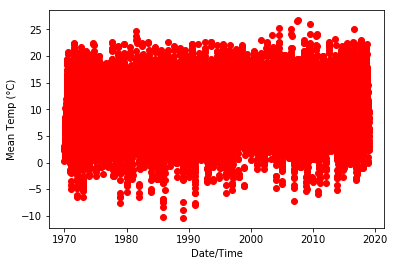

In [9]:
historic_plot('Victoria', 'Mean Temp (°C)')

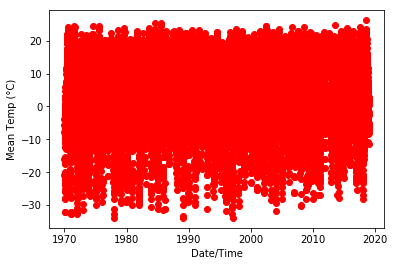

In [10]:
historic_plot('Calgary', 'Mean Temp (°C)')

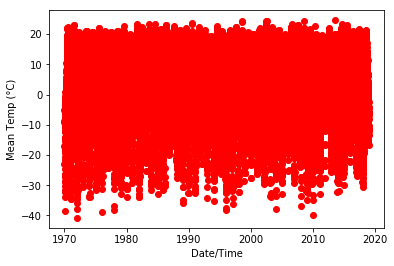

In [11]:
historic_plot('Edmonton', 'Mean Temp (°C)')

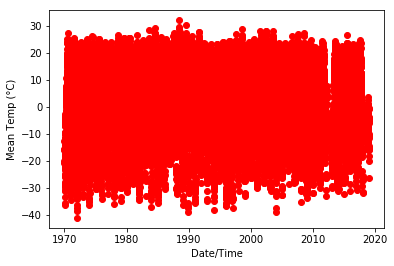

In [12]:
historic_plot('Saskatoon', 'Mean Temp (°C)')

----

**P4)** Write a function **vs_plot(cit1, cit2, wk)** that will take as input three arguments.  The first two arguments are city names in our 6b convention (eg: **w.sask** and **w.vic** for Saskatoon and Victoria respectively), and the third argument would be a key for a floating-point data type from **mdat** (eg: **Mean Temp (°C)** or **Total Rain (mm)**).  Your function would then create a matplotlib plot for that weather feature, of one city's weather vs. the other for all the dates we have in common in our data set.  Put the data for **cit1** on the x-axis, and **cit2** on the y-axis.  Include a linear and quadratic least-squares approximation. Use the library from Lecture 6c.

Include the output for these three commands **vs_plot("w.vic", "w.cal", "Mean Temp (°C)")**, **vs_plot("w.cal", "w.edm", "Mean Temp (°C)")**, **vs_plot("w.edm", "w.sask", "Mean Temp (°C)")** in your notebook.  In each, include a **print(c)** statement for your least square coefficients. 

**Pre-grading script:** Will check for your least-squares coefficients for the above four plots.

For problems P3 and P4, import and use the wdat library we created in Lecture 7c.

----

**P5)**  In this problem we ask you to make a step towards an improved **voronoi_diagram** algorithm. 

If you recall, in class we drew the voronoi diagram of a list of $n$ points in the plane. 
We followed that with a primitive (and flawed) algorithm 
to find the vertices where any three regions meet.   In this problem, we ask you to find a 
better algorithm to find those vertices, and ultimately a better way to compute the diagram.

You will create a new **voronoi_diagram** algorithm. This algorithm will take as input an $(n,2)$-shaped numpy
array, considered to be a list of $n$ points **PTS** in the plane. 

In your plot, include:

1. The input points, PTS, in green.
2. The 'triple points' that are equidistant from the three closest points of PTS. After completing steps (3) and (4) these points will be clear and there will be no need to label them.  But if you can not complete steps (3) and (4), plot these points in black and label them with the set of the three closest points, eg: {a,b,c} meaning PTS[a], PTS[b] and PTS[c] are equidistant and closest.
3. The lines between the triple points. Drawn in gray. i.e. these are lines that are equidistant from the two closest points of PTS.
4. The lines between the triple points and the boundary of your region. Drawn in red.
5. Labels on the points PTS, as well as the line segments (3) and (4).

Provided you choose the points PTS to have their coordinates in $[0,1]$ as in class, you can choose your 
region to be the square $[0,1]^2$. 

The line segments in (3) and (4) represent the regions in the plane that are equidistant to two points of PTS, 
yet all the remaining points of PTS are further-away than those two equidistant points.

Label your line segments in the notation $\{a,b\}$ meaning these are the points in the plane equidistant from PTS[a] and PTS[b], yet all the remaining points of PTS are further away.

Use the above ideas to write your voronoi_diagram code.  Include several plots, for various random input points.

If you follow all the above rules, your output should look like this. If the **.svg** image does not display, uncomment the **.png** display.

``` <img src='voronoi.png'/>```
<img src='voronoi.svg'/>